In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import get_file

In [2]:
classifier_url = ('https://tfhub.dev/google/imagenet/'
                  'resnet_v2_152/classification/4')

In [3]:
model = Sequential([hub.KerasLayer(classifier_url, input_shape=(224, 224, 3))])

In [4]:
image = load_img('beetle.jpg', target_size=(224, 224))
image = img_to_array(image)
image = image / 255.0
image = np.expand_dims(image, axis=0)

In [5]:
predictions = model.predict(image)

1/1 [==============================] - 4s 4s/step


In [6]:
prediction_index = np.argmax(predictions[0], axis=-1)

In [7]:
file_name = 'ImageNetLabels.txt'
file_url = ('https://storage.googleapis.com/'
            'download.tensorflow.org/data/ImageNetLabels.txt')
labels_path = get_file(file_name, file_url)

In [8]:
with open(labels_path) as f:
    imagenet_labels = np.array(f.read().splitlines())

In [9]:
predicted_class = imagenet_labels[prediction_index]

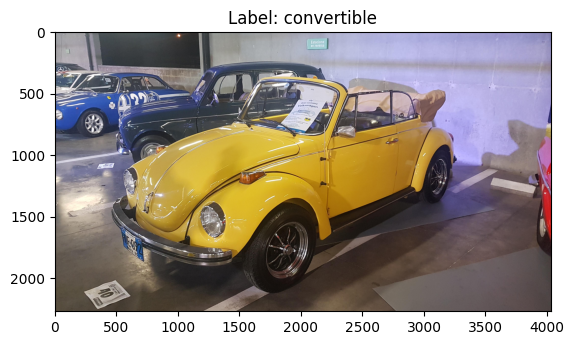

In [10]:
plt.figure()
plt.title(f"Label: {predicted_class}")
original = load_img('beetle.jpg')
original = img_to_array(original)
plt.imshow(original / 255.0)
plt.show()